### conceito

Gaussian Mixture Models (GMM) são modelos de **soft clustering**, isto é, em vez de atribuir cada ponto do dataset a um e somente um cluster, dá uma probabilidade de cada ponto pertencer a cada um dos clusters.

Gaussian Mixture é um conjunto de distribuições gaussianas, onde cada distribuição representará um cluster. Cada distribuição possuirá uma média, que indica o centro da distribuição, uma covariância, que indica a largura da distribuição, e uma probabilidade, que indica a altura da distribuição. Esses parâmetros formam as características de distribuição dos dados que pertencem àquela curva. A soma das probabilidades de todas as distribuições é = 1.

O algoritmo funciona da seguinte maneira:
    
    1 - criação k distribuições aleatórias;
    2 - atribuição dos pontos a cada uma das distribuições (soft, um ponto pode ter mais de um cluster);
    3 - a distribuição é ajustada levando em conta a atribuição dos pontos;
    4 - nova atribuição dos pontos e ajustamento das distribuições até que o ajuste seja alcançado.
    
**Akaike Information Criterion (AIC)** e **Bayesian Information Criterion (BIC)** são métodos probabilísticos para escolha de modelos. O primeiro é relacionado à abordagens frequentistas e o segundo à abordagens bayesianas, mas ambos buscam a menor perda de informação possível (information criteria -  IC). Ambos buscam dar um score para o modelo, sendo este formado por uma combinação de complexidade e de performance do modelo.

### comparação K-Means x GMM

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# gerando dados

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)

X = X[:, ::-1]

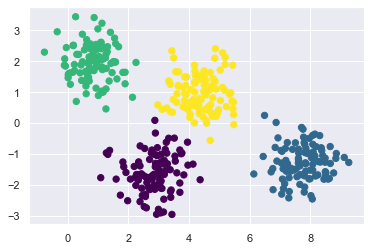

In [3]:
# dados clusterizados com K-Means

from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [4]:
# criando função para visualização do "espaço/área" de cada cluster com K-Means

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

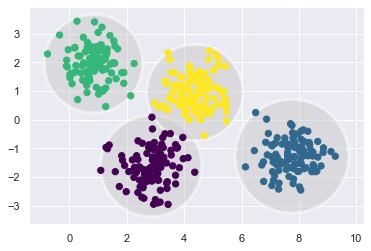

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

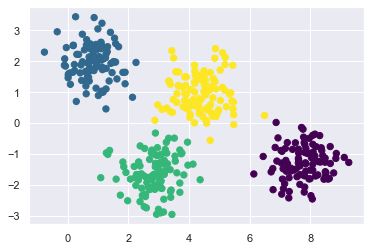

In [6]:
# GMM para os mesmos dados

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [7]:
# probabilidade de cada ponto pertencer a cada cluster (como os clusters estão bem definidos, muitos pontos ficam com 100% de probabilidade de pertencer a somente um cluster)

probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.469 0.    0.    0.531]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    1.    0.   ]]


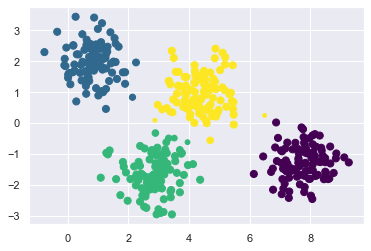

In [8]:
# o tamanho da representação de cada dado representa a chance de pertencer ao cluster ao qual está atribuido

size = 50 * probs.max(1) ** 2
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

In [9]:
# criando função para visualização do "espaço/área" de cada cluster com GMM

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

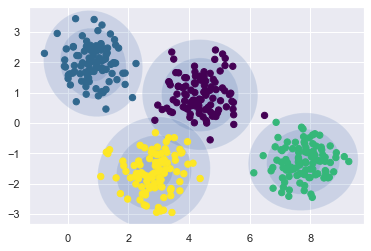

In [10]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)